# Import library


In [1]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# imputer (Missing Data Handling)
from sklearn.impute import SimpleImputer

# os
import os

In [2]:
from IPython.display import display, HTML

# display(HTML(df.to_html()))

In [3]:
# Pd Display
def pdisplay(df):
    display(pd.DataFrame(df))

# Import data

In [4]:
train_df_path = os.path.join('..', 'Data', 'Supplementary Information File 1 (SIF-1).xlsx')
test_df_path = os.path.join('..', 'Data', 'Supplementary Information File 2 (SIF-2).xlsx')

In [5]:
train_df = pd.read_excel(train_df_path)
test_df = pd.read_excel(test_df_path)

In [6]:
train_df.head()

,S.No,Compound,A,B,In literature,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,1,Ac2O3,Ac,Ac,False,cubic,element not in BV,element not in BV,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000
1,2,AcAgO3,Ac,Ag,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571
2,3,AcAlO3,Ac,Al,False,cubic,element not in BV,element not in BV,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714
3,4,AcAsO3,Ac,As,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429
4,5,AcAuO3,Ac,Au,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286


In [7]:
test_df.head()

,S.No,Compound,A,B,In literature,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,81,AgBiO3,Ag,Bi,False,rhombohedral,1,5,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,4.072914,0.542857
1,107,AgMoO3,Ag,Mo,False,cubic,1,5,1.28,0.95,0.61,1.93,2.16,2.761453,1.789300,-1.663536,0.942809,4.126280,0.435714
2,109,AgNbO3,Ag,Nb,True,rhombohedral,1,5,1.28,0.95,0.64,1.93,1.60,2.761453,1.955055,-1.972571,0.928944,4.072890,0.457143
3,122,AgReO3,Ag,Re,False,cubic,1,5,1.28,0.95,0.58,1.93,1.90,2.761453,1.987971,-1.729357,0.957094,4.201732,0.414286
4,125,AgSbO3,Ag,Sb,True,orthorhombic,1,5,1.28,0.95,0.60,1.93,2.05,2.761453,2.075849,-1.696143,0.947523,4.148925,0.428571


# Data Analysis

In [8]:
pd.DataFrame(train_df.dtypes)

,0
S.No,int64
Compound,object
A,object
B,object
In literature,bool
Lowest distortion,object
v(A),object
v(B),object
r(AXII)(Å),float64
r(AVI)(Å),float64


In [9]:
pdisplay(train_df['Lowest distortion'].value_counts())

,count
Lowest distortion,
cubic,3253
orthorhombic,1573
rhombohedral,323
tetragonal,127
-,53


In [10]:
no_ld_idx = train_df['Lowest distortion'] == '-'
train_df[no_ld_idx].shape[0]

53

- 53 values are not specified in lowest distortion.
- they are replaced by `-`

In [11]:
train_df['v(A)'].value_counts()

v(A)
not balanced         1881
element not in BV    1233
3                     935
2                     884
1                     222
4                     146
5                      28
Name: count, dtype: int64

In [12]:
vA_idx = train_df['v(A)']
no_vA_idx = (vA_idx == 'not balanced') | (vA_idx == 'element not in BV')
print("Unavailable v(A)")
train_df[no_vA_idx].shape[0]

Unavailable v(A)


3114

In [13]:
# not (no_Lowest_distion) and (no_vA_idx)
only_no_vA_idx = ~(no_ld_idx) & no_vA_idx
train_df[only_no_vA_idx].shape[0]

3063

- total unavailable data 3063

In [14]:
train_df['v(B)'].value_counts()

v(B)
not balanced         1881
element not in BV    1233
3                     935
4                     884
5                     222
2                     146
1                      28
Name: count, dtype: int64

In [15]:
train_df['τ'].value_counts

<bound method IndexOpsMixin.value_counts of 0              -
1              -
2              -
3              -
4              -
          ...   
5324    5.228952
5325           -
5326           -
5327           -
5328           -
Name: τ, Length: 5329, dtype: object>

In [16]:
train_df.isnull().sum()

S.No                 0
Compound             0
A                    0
B                    0
In literature        0
Lowest distortion    0
v(A)                 0
v(B)                 0
r(AXII)(Å)           0
r(AVI)(Å)            0
r(BVI)(Å)            0
EN(A)                0
EN(B)                0
l(A-O)(Å)            0
l(B-O)(Å)            0
ΔENR                 0
tG                   0
τ                    0
μ                    0
dtype: int64

In [17]:
train_df.describe()

,S.No,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
count,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000
mean,2665.000000,0.974656,0.825617,0.817845,1.572466,1.572466,2.289800,2.012587,-2.199993,0.766090,0.584176
std,1538.494123,0.337139,0.245000,0.247480,0.449248,0.449248,0.664239,0.598509,0.668465,0.136280,0.176770
min,1.000000,0.270000,0.270000,0.270000,0.790000,0.790000,0.000000,0.000000,-5.411536,0.384648,0.192857
25%,1333.000000,0.690000,0.630000,0.630000,1.200000,1.200000,2.290644,1.956808,-2.604821,0.668537,0.450000
50%,2665.000000,0.930000,0.800000,0.770000,1.550000,1.550000,2.393444,2.096141,-2.101179,0.756440,0.550000
75%,3997.000000,1.180000,0.950000,0.950000,1.930000,1.930000,2.571812,2.286435,-1.711500,0.850628,0.678571
max,5329.000000,1.880000,1.670000,1.670000,2.540000,2.540000,3.300176,3.009747,-0.601714,1.388809,1.192857


In [18]:
train_df.describe(include=['O'])

,Compound,A,B,Lowest distortion,v(A),v(B),τ
count,5329,5329,5329,5329,5329,5329,5329
unique,5329,73,73,5,7,7,1608
top,Ac2O3,Ac,Ac,cubic,not balanced,not balanced,-
freq,1,73,73,3253,1881,1881,3143


# Identifying issues in the dataset


## Dropping irrelevalent features
We need to drop the following columns- 
1. S.No
1. Compound
2. A
3. B
4. In literature
5. v(B)
6. r(BVI)(Å)


## need to remove the following rows-
- 53 compounds removed as does not specify **lowest distortion** type
- 3063 data removed as V(A) has 
    - “element not in BV”
    - “not balanced”
    - As $\tau$ depends on v(A) so unavailable $\tau$ will be taken care of

# Converting Categorical to Numerical
- **v(A)** by one hot encoding - only keep 1,2,3


### Analysis using pivot tables

In [19]:
train_df[['A','Lowest distortion']].groupby(['A']).describe()


Lowest distortion                          
               count unique           top freq
A                                             
Ac                73      4  orthorhombic   51
Ag                73      4  orthorhombic   30
Al                73      3         cubic   40
As                73      3         cubic   63
Au                73      3         cubic   57
..               ...    ...           ...  ...
W                 73      3         cubic   56
Y                 73      3         cubic   51
Yb                73      3  orthorhombic   43
Zn                73      3         cubic   54
Zr                73      2         cubic   54

[73 rows x 4 columns]

In [20]:
df = train_df[['A','Lowest distortion']].groupby(['A']).describe()
display(HTML(df.to_html()))

In [21]:
train_df[['A','Lowest distortion']].groupby(['Lowest distortion']).describe()


A                
                  count unique top freq
Lowest distortion                      
-                    53     23  Ni   14
cubic              3253     73   B   73
orthorhombic       1573     72  Sr   54
rhombohedral        323     54  Cu   27
tetragonal          127     42  Cs   19

# Data Visualization

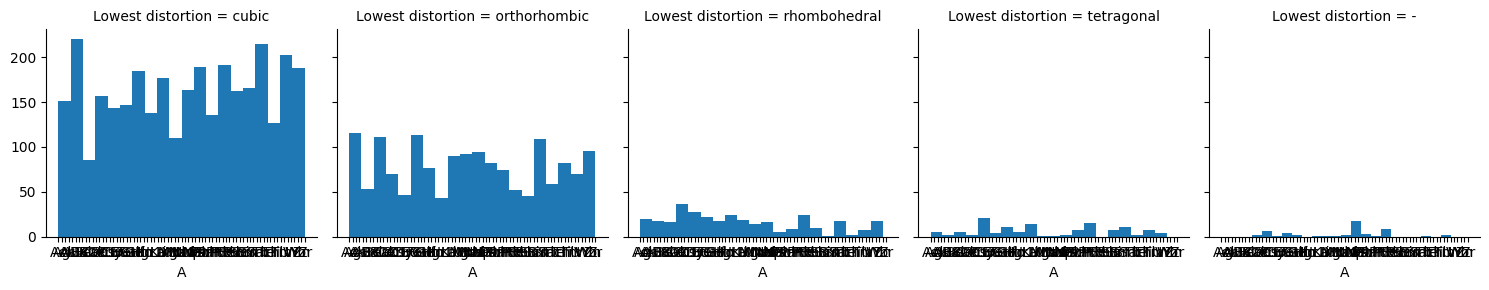

In [22]:
g = sns.FacetGrid(train_df, col='Lowest distortion')
g.map(plt.hist, 'A', bins=20)

# Feature Engineering

In [23]:
# no_tau_idx = train_df['τ'] == '-'
# train_df[no_tau_idx].shape[0]

## Dropping irrevalent features

In [24]:
train_df_new= train_df.drop([ 'S.No','Compound','A', 'B', 'In literature', 
                             'r(BVI)(Å)', 'v(B)'],axis=1)
train_df_new.head()

,Lowest distortion,v(A),r(AXII)(Å),r(AVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,cubic,element not in BV,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000
1,orthorhombic,element not in BV,1.12,1.12,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571
2,cubic,element not in BV,1.12,1.12,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714
3,orthorhombic,element not in BV,1.12,1.12,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429
4,orthorhombic,element not in BV,1.12,1.12,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286


# Converting a categorical feature

## Valance A (One Hot Encoding)

In [25]:
vA1 = train_df['v(A)'] == 1
vA2 = train_df['v(A)'] == 2
vA3 = train_df['v(A)'] == 3

train_df_new['v(A)1'] = vA1
train_df_new['v(A)2'] = vA2
train_df_new['v(A)3'] = vA3

train_df_new.head()

,Lowest distortion,v(A),r(AXII)(Å),r(AVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,v(A)1,v(A)2,v(A)3
0,cubic,element not in BV,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,False,False,False
1,orthorhombic,element not in BV,1.12,1.12,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,False,False,False
2,cubic,element not in BV,1.12,1.12,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,False,False,False
3,orthorhombic,element not in BV,1.12,1.12,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,False,False,False
4,orthorhombic,element not in BV,1.12,1.12,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,False,False,False


In [26]:
train_df_new=train_df_new.drop(['v(A)'],axis=1)
train_df_new.head()

,Lowest distortion,r(AXII)(Å),r(AVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,v(A)1,v(A)2,v(A)3
0,cubic,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,False,False,False
1,orthorhombic,1.12,1.12,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,False,False,False
2,cubic,1.12,1.12,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,False,False,False
3,orthorhombic,1.12,1.12,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,False,False,False
4,orthorhombic,1.12,1.12,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,False,False,False


In [27]:
pdisplay(train_df_new.dtypes)

,0
Lowest distortion,object
r(AXII)(Å),float64
r(AVI)(Å),float64
EN(A),float64
EN(B),float64
l(A-O)(Å),float64
l(B-O)(Å),float64
ΔENR,float64
tG,float64
τ,object


# Xtrain & ytrain

In [28]:
ytrain = train_df_new['Lowest distortion']
Xtrain = train_df_new.drop(['Lowest distortion'], axis=1)
print("Xtrain")
pdisplay(Xtrain.dtypes)
print("ytrain")
pdisplay(pd.DataFrame(ytrain).dtypes)


Xtrain


,0
r(AXII)(Å),float64
r(AVI)(Å),float64
EN(A),float64
EN(B),float64
l(A-O)(Å),float64
l(B-O)(Å),float64
ΔENR,float64
tG,float64
τ,object
μ,float64


ytrain


,0
Lowest distortion,object


# Missing Data Handling

In [29]:
rmv_idx = no_ld_idx | no_vA_idx 
Xtrain = Xtrain[~rmv_idx]
Xtrain.head()

,r(AXII)(Å),r(AVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,v(A)1,v(A)2,v(A)3
76,1.28,0.95,1.93,2.18,2.761453,1.932227,-1.389214,1.018842,4.762492,0.328571,True,False,False
78,0.75,0.95,1.93,2.04,2.761453,1.624662,-0.852321,0.910347,4.341915,0.192857,False,False,True
81,1.28,0.95,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,4.072914,0.542857,True,False,False
86,1.28,0.95,1.93,1.66,2.761453,1.960053,-1.679964,1.002670,4.577636,0.350000,True,False,False
100,1.28,0.95,1.93,2.20,2.761453,2.009083,-1.574536,0.961952,4.232002,0.407143,True,False,False


In [30]:
print('remaining data =', Xtrain.shape[0])
# train_df_new.shape[0]


remaining data = 2213


In [31]:
no_tau_idx = Xtrain['τ'] == '-'
Xtrain[no_tau_idx].shape[0]

27

In [32]:
# Xtrain['τ'][no_tau_idx] = np.nan
Xtrain.loc[no_tau_idx , 'τ'] = np.nan

In [33]:
Xtrain['τ'].isnull().sum()

27

In [34]:
Xtrain_column_name = Xtrain.columns
Xtrain_column_name

Index(['r(AXII)(Å)', 'r(AVI)(Å)', 'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)',
       'ΔENR', 'tG', 'τ', 'μ', 'v(A)1', 'v(A)2', 'v(A)3'],
      dtype='object')

In [35]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
Xtrain = imp.fit_transform(pd.DataFrame(Xtrain))
Xtrain = pd.DataFrame(Xtrain , columns=Xtrain_column_name)
Xtrain.head()

,r(AXII)(Å),r(AVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,v(A)1,v(A)2,v(A)3
0,1.28,0.95,1.93,2.18,2.761453,1.932227,-1.389214,1.018842,4.762492,0.328571,1.0,0.0,0.0
1,0.75,0.95,1.93,2.04,2.761453,1.624662,-0.852321,0.910347,4.341915,0.192857,0.0,0.0,1.0
2,1.28,0.95,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,4.072914,0.542857,1.0,0.0,0.0
3,1.28,0.95,1.93,1.66,2.761453,1.960053,-1.679964,1.002670,4.577636,0.350000,1.0,0.0,0.0
4,1.28,0.95,1.93,2.20,2.761453,2.009083,-1.574536,0.961952,4.232002,0.407143,1.0,0.0,0.0


## Correlation analysis

- Feature Corr of Xtrain

<Axes: >

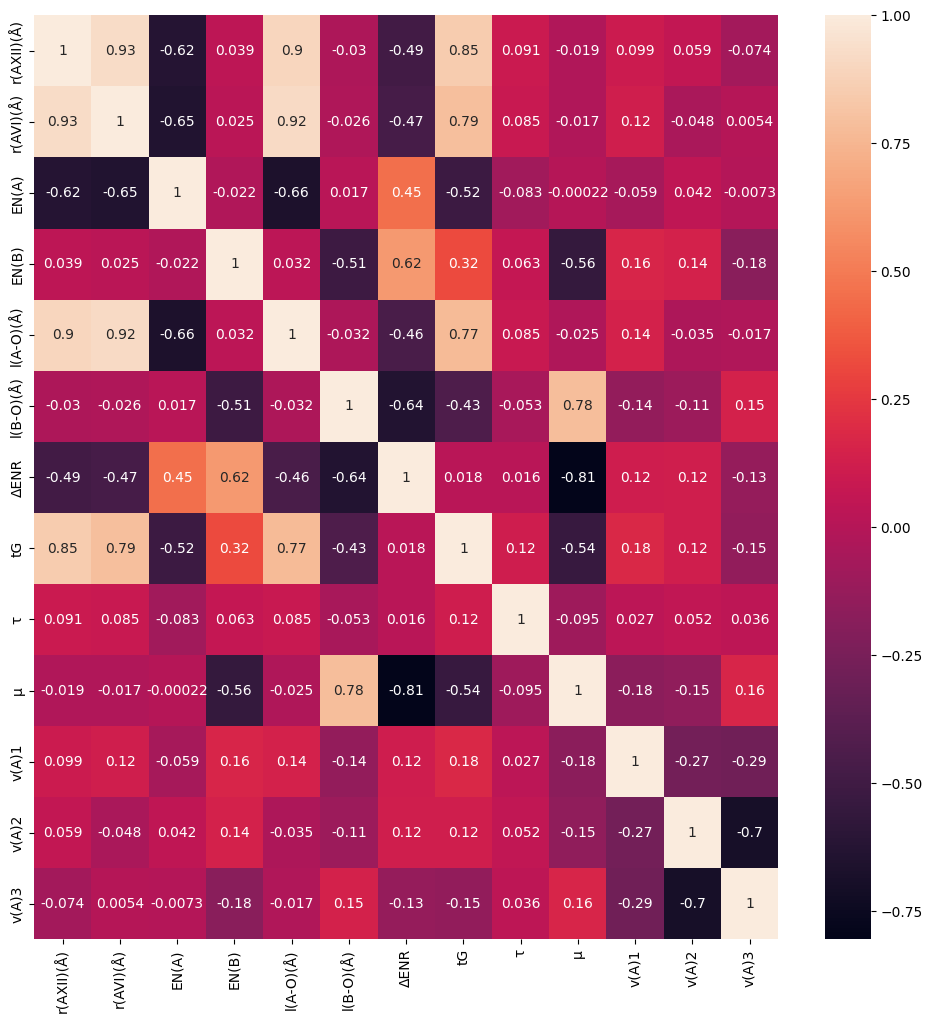

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(Xtrain.corr(), annot=True)

# Xtest & ytest